In [1]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=False)
from pandas_profiling import ProfileReport 
sns.set(rc={'figure.figsize':(50,50)})
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import make_pipeline




from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [35]:
data = pd.read_csv(r"C:\Users\Keith Martins\OneDrive\Documents\PYTHON\FIVERR PROJECTS\Black Friday Sales Prediction\train.csv")
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


#### Exploratory Data Analysis

In [4]:
data.mode()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1001680,P00265242,M,26-35,4,B,1,0,5,8.0,16.0,7011


In [5]:
data.shape

(550068, 12)

In [6]:
data.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

In [7]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [8]:
data.count()

User_ID                       550068
Product_ID                    550068
Gender                        550068
Age                           550068
Occupation                    550068
City_Category                 550068
Stay_In_Current_City_Years    550068
Marital_Status                550068
Product_Category_1            550068
Product_Category_2            376430
Product_Category_3            166821
Purchase                      550068
dtype: int64

##### Data Visualization ( As apart of EDA)

<AxesSubplot:xlabel='Purchase', ylabel='Density'>

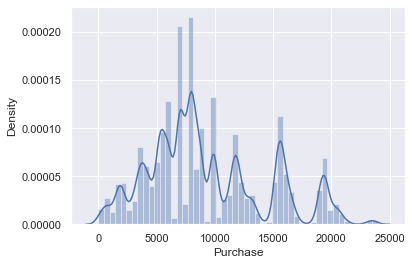

In [9]:
sns.distplot(data['Purchase'])

<AxesSubplot:ylabel='Frequency'>

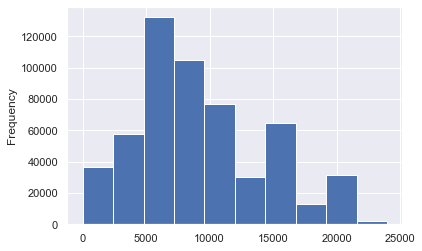

In [10]:
data['Purchase'].plot.hist() 

<AxesSubplot:xlabel='Occupation', ylabel='Density'>

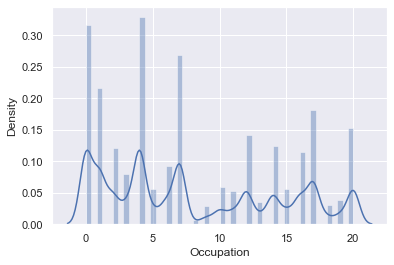

In [11]:
sns.distplot(data['Occupation'])

<AxesSubplot:>

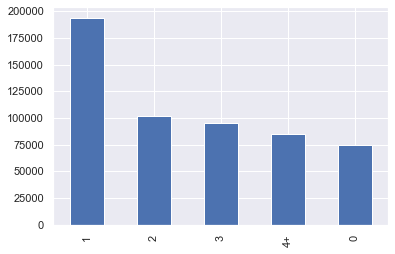

In [12]:
data['Stay_In_Current_City_Years'].value_counts().plot.bar()

<AxesSubplot:>

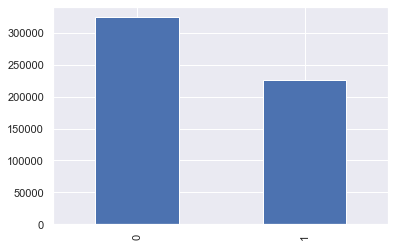

In [13]:
data['Marital_Status'].value_counts().plot.bar() 

<AxesSubplot:>

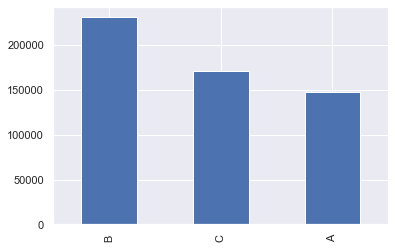

In [14]:
data['City_Category'].value_counts().plot.bar()

<AxesSubplot:>

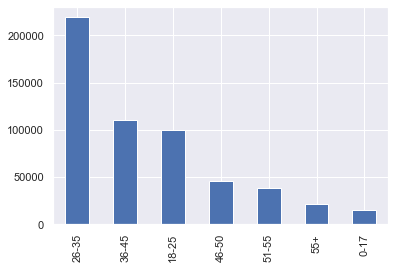

In [15]:
data['Age'].value_counts().plot.bar()

<AxesSubplot:>

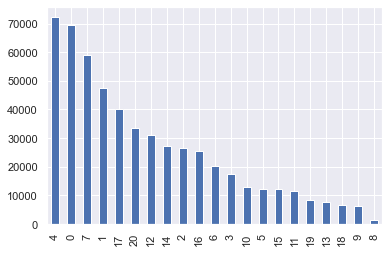

In [16]:
data['Occupation'].value_counts().plot.bar() 

<AxesSubplot:>

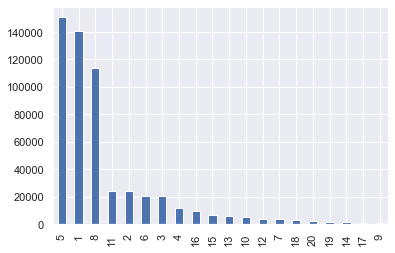

In [17]:
data['Product_Category_1'].value_counts().plot.bar() 

<AxesSubplot:>

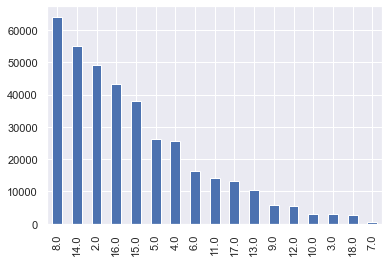

In [18]:
data['Product_Category_2'].value_counts().plot.bar() 

<AxesSubplot:>

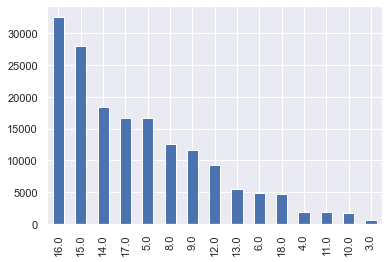

In [19]:
data['Product_Category_3'].value_counts().plot.bar() 

In [4]:
data_corr = data.corr()
#sns.heatmap(data_corr)
data_corr.style.background_gradient(cmap = 'coolwarm')

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.001529,0.003419,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,0.001529,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.209918
Product_Category_3,0.003419,0.013263,0.019473,0.229678,0.543649,1.000000,-0.022006
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


#### Data Pre-processing

In [36]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [37]:
data1 =  data.copy()

In [38]:
data1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [39]:
gender_label  = le.fit_transform(data1['Gender'])
occupation_label = le.fit_transform(data1['Occupation'])
city_label = le.fit_transform(data1['City_Category'])
stay_label = le.fit_transform(data1['Stay_In_Current_City_Years'])
marital_label = le.fit_transform(data1['Marital_Status'])
product_label1 = le.fit_transform(data1['Product_Category_1'])
product_label2 = le.fit_transform(data1['Product_Category_2'])
product_label3 = le.fit_transform(data1['Product_Category_3'])
age_label = le.fit_transform(data1['Age'])

In [40]:
data1['Gender'] = gender_label
data1['Age'] = age_label
data1['Occupation'] = occupation_label
data1['City_Category'] = city_label
data1['Stay_In_Current_City_Years'] = stay_label
data1['Marital_Status'] = marital_label
data1['Product_Category_1'] = product_label1
data1['Product_Category_2'] = product_label2
data1['Product_Category_3'] = product_label3

In [41]:
data1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,2,17,15,8370
1,1000001,P00248942,0,0,10,0,2,0,0,4,10,15200
2,1000001,P00087842,0,0,10,0,2,0,11,17,15,1422
3,1000001,P00085442,0,0,10,0,2,0,11,12,15,1057
4,1000002,P00285442,1,6,16,2,4,0,7,17,15,7969


#### Outlier Detection and Removal

Text(0.5, 0, 'Age')

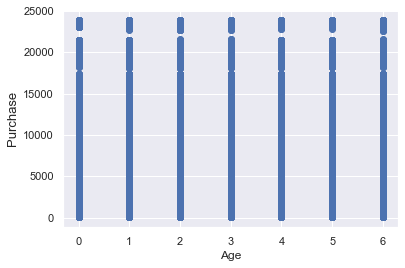

In [11]:
fig, ax = plt.subplots()
ax.scatter(x = data1['Age'], y = data1['Purchase'])
plt.ylabel('Purchase', fontsize = 13)
plt.xlabel('Age')

In [42]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics


 mu = 9263.97 and sigma = 5023.06



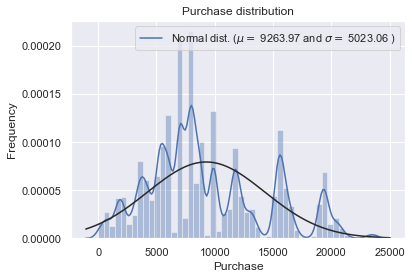

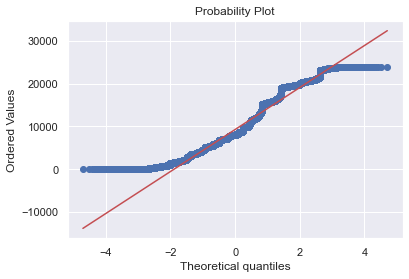

In [43]:
sns.distplot(data['Purchase'], fit=norm);

(mu, sigma) = norm.fit(data['Purchase'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Purchase distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['Purchase'], plot=plt)
plt.show()

<AxesSubplot:ylabel='Frequency'>

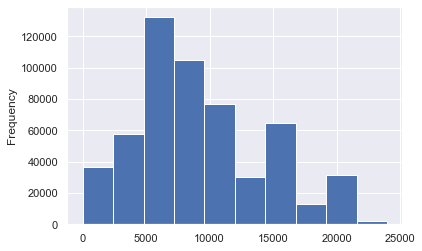

In [44]:
data1['Purchase'].plot.hist() # the graph shows that a purchase value above 20000 is an outlier. Therefore the occurence of a value above 2000 is very minimal

In [45]:
data1 = data1.drop(data1[(data1['Purchase']> 20000)].index)

<AxesSubplot:ylabel='Frequency'>

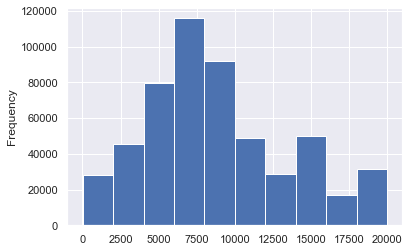

In [46]:
data1['Purchase'].plot.hist()

###### Log transformation of the predicted value


 mu = 8.92 and sigma = 0.73



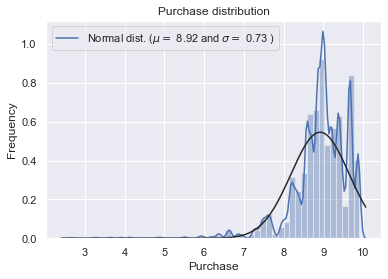

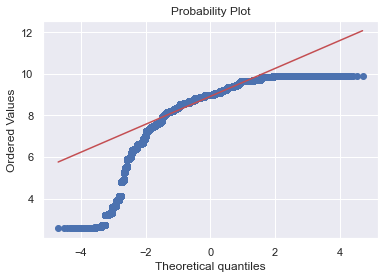

In [47]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column to transformthe data to normal distribution
data1['Purchase'] = np.log1p(data1['Purchase'])


# Check the new distribution of the target Variable.
sns.distplot(data1['Purchase'], fit=norm);

(mu, sigma) = norm.fit(data1['Purchase'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Purchase distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data1['Purchase'], plot=plt)
plt.show()

In [55]:
#np.expm1(data1['Purchase'])
#data1['Purchase']

#### Handling missing data 

In [50]:
data1.count() # no need to fill with the mean, all records

User_ID                       537377
Product_ID                    537377
Gender                        537377
Age                           537377
Occupation                    537377
City_Category                 537377
Stay_In_Current_City_Years    537377
Marital_Status                537377
Product_Category_1            537377
Product_Category_2            537377
Product_Category_3            537377
Purchase                      537377
dtype: int64

##### Check for Skewness

#### Dropping of Columns

In [56]:
data2 = data1.drop(['User_ID', 'Product_ID'], axis = 'columns') #, 'Marital_Status', 'Stay_In_Current_City_Years', 'City_Category', 'Occupation'
data2.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2,0,2,17,15,9.032529
1,0,0,10,0,2,0,0,4,10,9.629116
2,0,0,10,0,2,0,11,17,15,7.260523
3,0,0,10,0,2,0,11,12,15,6.964136
4,1,6,16,2,4,0,7,17,15,8.983440


#### Feature Importance

In [78]:
from sklearn.feature_selection import mutual_info_classif

In [79]:
importances = mutual_info_classif(x_train, y_train)
importances

array([0.12932305, 0.02945467, 0.00944216, 0.04100229, 0.0187518 ,
       0.02484664, 1.65922755, 0.5337778 , 0.27425679])

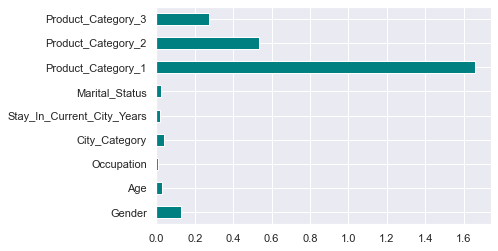

In [ ]:
feat_importances = pd.Series(importances, data2.columns[0:len(data2.columns)-1])
feat_importances.plot(kind='barh', color = 'teal')
plt.show()

#### Data Splitting

In [57]:
x_train = data2.drop('Purchase', axis = 'columns')
y_train = data2['Purchase']

#### Cross validation

#### Randomized Search CV

##### Cross Validation

In [60]:
n_folds = 10

def rmsle_cv(model):
    kf = StratifiedKFold(n_folds, shuffle=True, random_state=42).get_n_splits(x_train.values)
    rmse= np.sqrt(-cross_val_score(model, x_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [61]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(kernel='polynomial', degree=2, coef0=2.5) #alpha=0.6, 
GBoost = GradientBoostingRegressor()
                             #n_estimators=3000, learning_rate=0.05,
                             #max_depth=4, max_features='sqrt',
                             #min_samples_leaf=15, min_samples_split=10, 
                             #loss='huber', random_state =5
model_xgb = xgb.XGBRegressor()
                             #colsample_bytree=0.4603, gamma=0.0468, 
                             #learning_rate=0.05, max_depth=3, 
                             #min_child_weight=1.7817, n_estimators=2200,
                             #reg_alpha=0.4640, reg_lambda=0.8571,
                             #subsample=0.5213, silent=1,
                             #random_state =7, nthread = -1
model_lgb = lgb.LGBMRegressor(objective='regression') 
                              #,num_leaves=5,
                              #learning_rate=0.05, n_estimators=720,
                              #max_bin = 55, bagging_fraction = 0.8,
                              #bagging_freq = 5, feature_fraction = 0.2319,
                              #feature_fraction_seed=9, bagging_seed=9,
                              #min_data_in_leaf =6, min_sum_hessian_in_leaf = 11

In [62]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))


Lasso score: 0.6310 (0.1484)

ElasticNet score: 0.6310 (0.1484)

Kernel Ridge score: nan (nan)

Gradient Boosting score: 0.4384 (0.1835)

Xgboost score: 0.4252 (0.1845)

LGBM score: 0.4299 (0.1848)



In [63]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1) 

In [65]:
averaged_models = AveragingModels(models = (GBoost, model_xgb, model_lgb))

score = rmsle_cv(averaged_models)
print(" RMSE of the Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.4294 (0.1847)



##### Model Stacking

In [66]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [69]:
stacked_averaged_models = StackingAveragedModels(base_models = (model_xgb, model_lgb),
                                                 meta_model = GBoost)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: nan (nan)


#### Model Ensembling

In [70]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [85]:
model_xgb.fit(x_train, y_train)
xgb_train_pred = model_xgb.predict(x_train)
xgb_pred = np.expm1(model_xgb.predict(test_data2))
print(rmsle(y_train, xgb_train_pred))

0.36244105836632573


In [87]:
model_lgb.fit(x_train, y_train)
lgb_train_pred = model_lgb.predict(x_train)
lgb_pred = np.expm1(model_lgb.predict(test_data2.values))
print(rmsle(y_train, lgb_train_pred))

0.36944895507962605


In [88]:
model_lgb.fit(x_train, y_train)
lgb_train_pred = model_lgb.predict(x_train)
lgb_pred = np.expm1(model_lgb.predict(test_data2.values))
print(rmsle(y_train, lgb_train_pred))

0.36944895507962605


In [84]:
GBoost.fit(x_train.values, y_train)
GBoost_train_pred = GBoost.predict(x_train.values)
GBoost_pred = np.expm1(GBoost.predict(test_data2.values))
print(rmsle(y_train, GBoost_train_pred))

0.3788548406454405


##### Ensembling Prediction

In [90]:
print('RMSLE score on train data:')
print(rmsle(y_train,xgb_train_pred*0.55 +
               xgb_train_pred*0.1 + lgb_train_pred*0.35 ))

RMSLE score on train data:
0.36410353980134735


In [92]:
ensemble = xgb_pred*0.50 + GBoost_pred*0.25 + lgb_pred*0.25
ensemble

array([13368.88345591,  9924.04806547,  6048.05225489, ...,
       11644.43432156, 15393.1370163 ,  2171.68295151])

In [95]:
test_data2['Purchase'] = ensemble

In [97]:
test_data2.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1,4,7,1,2,1,0,9,15,13368.883456
1,1,2,17,2,0,0,2,3,15,9924.048065
2,0,3,1,1,4,1,4,12,15,6048.052255
3,0,3,1,1,4,1,3,7,15,2608.528668
4,0,2,1,2,1,0,3,3,8,2513.383026


In [98]:
test_data2.to_csv(r"C:\Users\Keith Martins\OneDrive\Documents\PYTHON\FIVERR PROJECTS\Black Friday Sales Prediction\THE_Submission_file3.csv")

#### Regression Analysis

##### Random Forest Regressor

In [113]:
reg = RandomForestRegressor() #n_estimators= 200, min_samples_split=2, min_samples_leaf=4, max_features='auto', max_depth=70, bootstrap=True

##### Gradient Boosting Regressor

In [114]:
reg.fit(x_train, y_train)

RandomForestRegressor()

In [54]:
reg.feature_importances_

array([2.04949306e-04, 7.66007036e-04, 5.05615057e-04, 1.26087304e-03,
       3.71587563e-05, 3.30335825e-05, 9.93579675e-01, 2.47602552e-03,
       1.13666251e-03])

#### Test Data Cleaning

In [75]:
test_data = pd.read_csv(r"C:\Users\Keith Martins\OneDrive\Documents\PYTHON\FIVERR PROJECTS\Black Friday Sales Prediction\test.csv")
test_data.head()         

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [76]:
test_data1 = test_data.copy()

In [77]:
T_gender_label  = le.fit_transform(test_data1['Gender'])
T_occupation_label = le.fit_transform(test_data1['Occupation'])
T_city_label = le.fit_transform(test_data1['City_Category'])
T_stay_label = le.fit_transform(test_data1['Stay_In_Current_City_Years'])
T_marital_label = le.fit_transform(test_data1['Marital_Status'])
T_product_label1 = le.fit_transform(test_data1['Product_Category_1'])
T_product_label2 = le.fit_transform(test_data1['Product_Category_2'])
T_product_label3 = le.fit_transform(test_data1['Product_Category_3'])
T_age_label = le.fit_transform(test_data1['Age'])

In [78]:
test_data1['Gender'] = T_gender_label
test_data1['Age'] = T_age_label
test_data1['Occupation'] = T_occupation_label
test_data1['City_Category'] = T_city_label
test_data1['Stay_In_Current_City_Years'] = T_stay_label
test_data1['Marital_Status'] = T_marital_label
test_data1['Product_Category_1'] = T_product_label1
test_data1['Product_Category_2'] = T_product_label2
test_data1['Product_Category_3'] = T_product_label3

In [79]:
test_data2 = test_data1.copy()

In [80]:
test_data2.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,1,4,7,1,2,1,0,9,15
1,1000009,P00113442,1,2,17,2,0,0,2,3,15
2,1000010,P00288442,0,3,1,1,4,1,4,12,15
3,1000010,P00145342,0,3,1,1,4,1,3,7,15
4,1000011,P00053842,0,2,1,2,1,0,3,3,8


##### Drop unnecessary columns

In [81]:
test_data2 = test_data2.drop(['User_ID','Product_ID'], axis='columns')   #, 'Marital_Status', 'Stay_In_Current_City_Years', 'City_Category', 'Occupation'

In [82]:
test_data2 = pd.get_dummies(test_data2)
test_data2.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1,4,7,1,2,1,0,9,15
1,1,2,17,2,0,0,2,3,15
2,0,3,1,1,4,1,4,12,15
3,0,3,1,1,4,1,3,7,15
4,0,2,1,2,1,0,3,3,8


#### Predictions

In [129]:
predictions = reg.predict(test_data2)

In [130]:
test_data3 = test_data2.copy()

In [131]:
test_data3['Purchase'] = reg.predict(test_data2)

In [132]:
test_data3.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1,4,7,1,2,1,0,9,15,0.839719
1,1,2,17,2,0,0,2,3,15,0.837800
2,0,3,1,1,4,1,4,12,15,0.766976
3,0,3,1,1,4,1,3,7,15,0.801284
4,0,2,1,2,1,0,3,3,8,0.804042


In [133]:
test_data3['Purchase'] = np.exp(test_data3['Purchase'])
test_data3.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1,4,7,1,2,1,0,9,15,2.315716
1,1,2,17,2,0,0,2,3,15,2.311277
2,0,3,1,1,4,1,4,12,15,2.153244
3,0,3,1,1,4,1,3,7,15,2.228401
4,0,2,1,2,1,0,3,3,8,2.234555


In [89]:
test_data3.to_csv(r"C:\Users\Keith Martins\OneDrive\Documents\PYTHON\FIVERR PROJECTS\Black Friday Sales Prediction\THE_Submission_file2.csv")

In [134]:
X = np.e**test_data3['Purchase'] - 1

In [135]:
X

0         9.132172
1         9.087301
2         7.612754
3         8.285004
4         8.342325
            ...   
233594    7.459671
233595    7.459671
233596    9.190876
233597    7.515227
233598    8.371180
Name: Purchase, Length: 233599, dtype: float64

## Regression plots

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

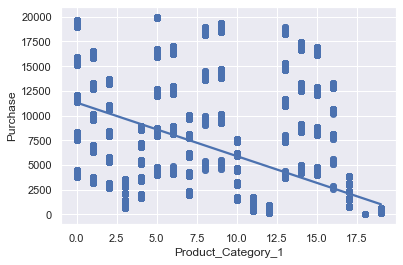

In [104]:
sns.regplot(x = 'Product_Category_1', y = 'Purchase', data = data2)

In [105]:
sns.regplot(x = 'Product_Category_3', y = 'Purchase', data = data__2)

NameError: name 'data__2' is not defined

In [ ]:
sns.regplot(x = 'Product_Category_1', y = 'Product_Category_3', data = data__2)

In [ ]:
sns.regplot(x = 'Marital_Status', y = 'Occupation', data = data__2)

### Lets do some Cross Validation on the data

In [ ]:
from sklearn.model_selection import  cross_val_score

In [ ]:
from sklearn.linear_model import LinearRegression
lr =LinearRegression()

In [ ]:
print(cross_val_score(lr, X, Y, cv = 3))

## Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

In [ ]:
lr.score(X_test, Y_test)

In [ ]:
predictions = lr.predict(X_test)
predictions

In [ ]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(X_train, Y_train)
r_value ** 2


In [ ]:
plt.scatter(Y_test, predictions)
#plt.plot(Y_test, predictions, c='r')
#plt.show()

In [ ]:
print(lr.intercept_)
print(lr.coef_)

## Polynomial Regression Model

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
pr = Polynomial(degree=4)
xp = np.linspace(0, 7, 10)
plt.scatter(data__2['Occupation'].values, data__2['Purchase'].values)
plt.plot(xp, pr(xp), c='r')
plt.show()

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(data__2['Purchase'], pr(data__2['Occupation']))

print(r2)


In [ ]:

pr1 = PolynomialFeatures(degree=4)
X_poly = pr1.fit_transform(X_train)
X_test_poly = pr1.transform(Y_train)
#lr.fit(X_poly, Y_train)
lr.predict(X_test)
#lr.score(X_test,Y_test)

In [ ]:
#plt.scatter(X_train, Y_train, color = 'blue')
plt.plot(lr.predict(X_poly), color = 'r')

In [ ]:
X_test

<img src="Desktop/the_end.jpg" alt="C.E.O" height="1200" width="1200"></a>